In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('student_admission_dataset.csv')
df

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


In [14]:
df['Admission_Status'].unique()

array(['Rejected', 'Accepted', 'Waitlisted'], dtype=object)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


✅ Accuracy: 0.34


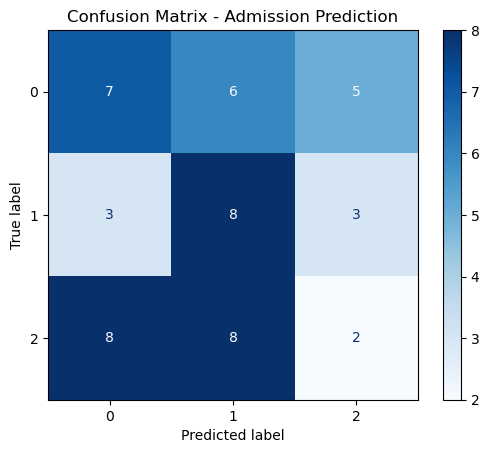


Feature Importance:
                      Feature  Coefficient
0                         GPA     0.404947
1                   SAT_Score    -0.001227
2  Extracurricular_Activities     0.043700


In [23]:
# Step 3: Features and target
X = df[["GPA", "SAT_Score", "Extracurricular_Activities"]]
y = df["Admission_Status"].map({"Rejected": 0, "Accepted": 1, "Waitlisted":2 })  # Encode target

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Step 6: Predictions
y_pred = log_reg.predict(X_test)

# Step 7: Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix - Admission Prediction")
plt.show()

# Step 8: Coefficients (importance of features)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
})
print("\nFeature Importance:")
print(coef_df)

In [22]:
y_pred

array([1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1,
       0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1,
       1, 1, 1, 0, 1, 0])

In [9]:
print(df["Admission_Status"].value_counts())


Admission_Status
Waitlisted    88
Rejected      81
Accepted      81
Name: count, dtype: int64


In [33]:
df.describe()


,GPA,SAT_Score,Extracurricular_Activities
count,250.000000,250.000000,250.000000
mean,3.238320,1250.432000,5.204000
std,0.438607,204.733163,2.964716
min,2.500000,900.000000,0.000000
25%,2.850000,1080.250000,3.000000
50%,3.230000,1237.000000,5.000000
75%,3.590000,1426.000000,7.750000
max,4.000000,1598.000000,10.000000


In [36]:
df

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


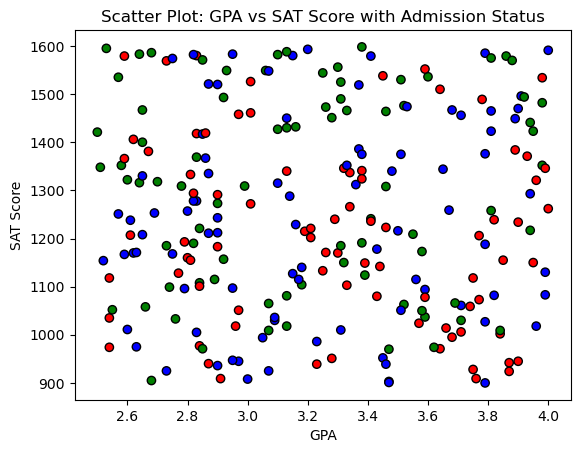

In [37]:
colors = df["Admission_Status"].map({"Rejected": "red", "Accepted": "green", 'Waitlisted':"blue" })

plt.scatter(df["GPA"], df["SAT_Score"], c=colors, edgecolors="k")
plt.xlabel("GPA")
plt.ylabel("SAT Score")
plt.title("Scatter Plot: GPA vs SAT Score with Admission Status")
plt.show()